<a href="https://colab.research.google.com/github/gauravguptagtm/deep-learning-notebook/blob/main/DL(12)_Gradient_Descent).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent

- It as an algorithm toperform optimization.
- By far, it is most common way for optimize NN.
- It's a way to minimize an objective function(loss function).
- The learning rate decide the size of step we take to reach a local minimum.
- We have three variant which is depend on amount of data use to compute the gradient of objective function.


# Batch / Stochastic GD
- In batch, we take whole data points for update.
- In stochastic GD, we take single row at a time, and for that we update only.
- Frequency of weight update is higher in stochastic GD.


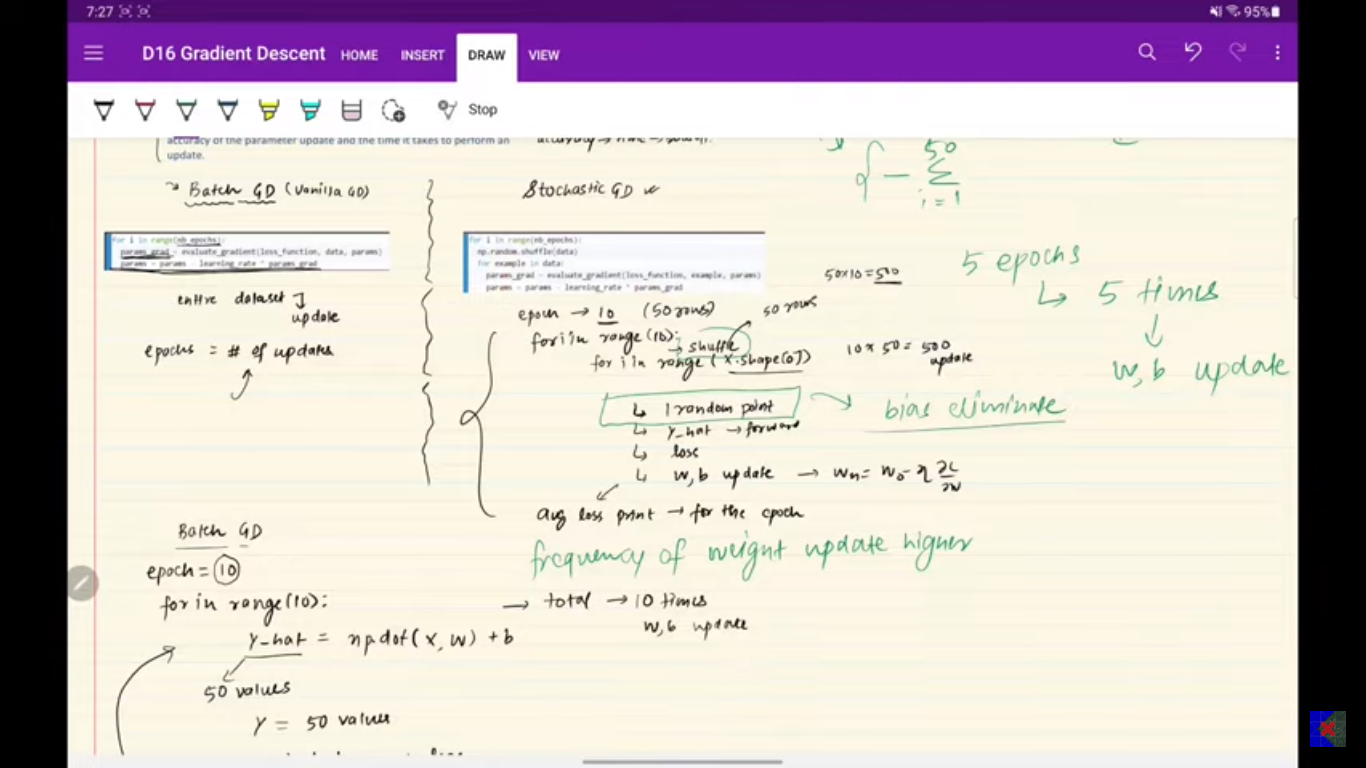

## Which is faster (same no of epoch)?
- Batch GD

## Which is faster to converge?
- Stochastic GD

### Note:
- Loss function decreases in unstable way in Stochastic GD while smoothly in Batch GD.
- This spiky behaviour in SGD helps in to move out from local minima.

## Vectorization
- We use Dot product in Batch GD which is replacement of loops, it doesn't works well when we have a large dataset.

# Mini batch GD
- We just make some smaller batches and in each epoch, we take one by one batch and update.

## Why batch size is provided in multiple of 2?

-It is for effective use of RAM(optimization technique).

## What if batch_size doesn't divide no of rows properly?
- Here last batch have less no of row.


# Vanishing GD

- In machine learning, the vanishing gradient problem is encountered when training recurrent neural networks with gradient-based learning methods and backpropagation.
- In such methods, during each iteration of training each of the neural networks weights receives an update proportional to the partial derivative of the error function with respect to the current weight.
- The problem is that as the sequence length increases, the gradient magnitude typically is expected to decrease (or grow uncontrollably), slowing the training process.
- In the worst case, this may completely stop the neural network from further training.
- Happens mostly in sigmid/tanh.

## How to recognize?
- If there is no changes over loss.
- Draw a Graph, epoch vs weights -> if doesn't change, its a problem.



In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt

In [3]:
X, y = make_moons(n_samples=250, noise = 0.05, random_state=42)

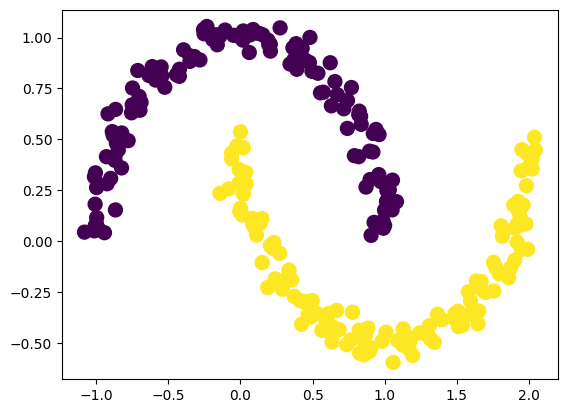

In [7]:
plt.scatter(X[:,0], X[:, 1], c=y, s=100)
plt.show()

In [32]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
old_weights = model.get_weights()[0]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
7/7 [==============================] - 2s 4ms/step - loss: 0.8046 - accuracy: 0.4900
Epoch 2/20
7/7 [==============================] - 0s 5ms/step - loss: 0.7882 - accuracy: 0.4900
Epoch 3/20
7/7 [==============================] - 0s 5ms/step - loss: 0.7754 - accuracy: 0.4900
Epoch 4/20
7/7 [==============================] - 0s 4ms/step - loss: 0.7616 - accuracy: 0.4900
Epoch 5/20
7/7 [==============================] - 0s 5ms/step - loss: 0.7507 - accuracy: 0.4900
Epoch 6/20
7/7 [==============================] - 0s 4ms/step - loss: 0.7413 - accuracy: 0.4900
Epoch 7/20
7/7 [==============================] - 0s 4ms/step - loss: 0.7323 - accuracy: 0.4900
Epoch 8/20
7/7 [==============================] - 0s 4ms/step - loss: 0.7252 - accuracy: 0.4900
Epoch 9/20
7/7 [==============================] - 0s 5ms/step - loss: 0.7203 - accuracy: 0.4900
Epoch 10/20
7/7 [==============================] - 0s 6ms/step - loss: 0.7148 - accuracy: 0.4900
Epoch 11/20
7/7 [======================

In [37]:
new_weights = model.get_weights()[0]

In [38]:
model.optimizer.get_config()["learning_rate"]

0.001

In [39]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [40]:
gradient

array([[-0.3814101 , -1.0075867 ,  0.46390292,  2.2360682 ,  1.226604  ,
        -0.1539439 ,  1.2435019 , -1.4964341 , -3.4929214 , -3.1195579 ],
       [ 0.5466938 ,  1.1295676 , -0.2233982 , -2.6685593 , -1.6525387 ,
         0.29975176, -1.0527819 ,  1.5380679 ,  3.531426  ,  2.9460785 ]],
      dtype=float32)

In [41]:
percent_change

array([[0.05835474, 0.41790205, 0.07891187, 0.60475534, 0.23113987,
        0.0638513 , 0.42338493, 0.29687396, 0.85853785, 4.6005855 ],
       [0.18590568, 1.473197  , 0.03332381, 0.45138937, 0.2828655 ,
        0.06099017, 0.46013454, 0.6109285 , 0.7375634 , 0.62676764]],
      dtype=float32)

In [42]:
old_weights

array([[-0.65360606, -0.24110594, -0.5878747 ,  0.36974758,  0.53067607,
        -0.24109751,  0.2937048 , -0.50406384, -0.4068454 ,  0.06780785],
       [-0.2940705 ,  0.07667458,  0.67038625, -0.59118795, -0.5842136 ,
         0.49147552, -0.22879872,  0.2517591 , -0.4787963 , -0.47004324]],
      dtype=float32)

In [43]:
new_weights

array([[-0.65322465, -0.24009836, -0.5883386 ,  0.3675115 ,  0.52944946,
        -0.24094357,  0.2924613 , -0.5025674 , -0.40335247,  0.07092741],
       [-0.2946172 ,  0.07554501,  0.67060965, -0.5885194 , -0.5825611 ,
         0.49117577, -0.22774594,  0.25022104, -0.48232773, -0.47298932]],
      dtype=float32)

# Solutions of this problem



1.   Reduce model complexity
  - Use a shallow NN.
  - Not a good approach



In [44]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
model.get_weights()[0]

array([[ 0.39148754, -0.36004686,  0.35192496, -0.16546702, -0.64058995,
        -0.02945071, -0.7040715 ,  0.35495406,  0.4442131 ,  0.6118031 ],
       [ 0.18934137, -0.25302556,  0.15013468, -0.32038802,  0.05022722,
        -0.1847812 , -0.5686392 ,  0.08559114, -0.00788009,  0.3246804 ]],
      dtype=float32)

In [47]:
old_weights = model.get_weights()[0]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [49]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 0.7210 - accuracy: 0.5100
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7107 - accuracy: 0.5100
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7045 - accuracy: 0.5100
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6991 - accuracy: 0.5100
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5100
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5100
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5100
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5100
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5100
Epoch 11/100
7/7 [===========

In [50]:
new_weights = model.get_weights()[0]

In [51]:
model.optimizer.get_config()["learning_rate"]

0.001

In [52]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [53]:
gradient

array([[ -531.5773 ,  -653.2951 ,   668.42944,  -667.0474 ,   476.7643 ,
          645.6776 ,   506.86298,   504.7452 ,  -530.6438 ,  -580.7951 ],
       [  959.9969 ,   958.2874 , -1046.5638 ,  1027.9059 , -1020.4422 ,
        -1071.0009 ,  -984.71436,  -781.6071 ,  1015.4792 ,  1128.8881 ]],
      dtype=float32)

In [54]:
percent_change

array([[  135.78397,   181.44725,   189.93524,   403.13013,    74.42582,
         2192.4006 ,    71.99027,   142.20016,   119.45704,    94.9317 ],
       [  507.01913,   378.7315 ,   697.0834 ,   320.83157,  2031.6517 ,
          579.6049 ,   173.17032,   913.187  , 12886.642  ,   347.6921 ]],
      dtype=float32)

In [55]:
old_weights

array([[ 0.39148754, -0.36004686,  0.35192496, -0.16546702, -0.64058995,
        -0.02945071, -0.7040715 ,  0.35495406,  0.4442131 ,  0.6118031 ],
       [ 0.18934137, -0.25302556,  0.15013468, -0.32038802,  0.05022722,
        -0.1847812 , -0.5686392 ,  0.08559114, -0.00788009,  0.3246804 ]],
      dtype=float32)

In [56]:
new_weights

array([[ 0.9230648 ,  0.29324833, -0.31650454,  0.5015804 , -1.1173543 ,
        -0.67512834, -1.2109345 , -0.14979117,  0.9748569 ,  1.1925982 ],
       [-0.7706556 , -1.211313  ,  1.1966985 , -1.3482939 ,  1.0706694 ,
         0.88621974,  0.41607517,  0.8671983 , -1.0233593 , -0.80420774]],
      dtype=float32)

2. Using ReLU activation function

$$
 max(0, z)
$$

- Here we have problem of Dying ReLU sometimes.

In [57]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [58]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [59]:
old_weights = model.get_weights()[0]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [61]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 2s 5ms/step - loss: 0.6944 - accuracy: 0.4900
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6926 - accuracy: 0.4850
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.7900
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6895 - accuracy: 0.7900
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6872 - accuracy: 0.8250
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6841 - accuracy: 0.8150
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6803 - accuracy: 0.8600
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6749 - accuracy: 0.8450
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6678 - accuracy: 0.8700
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6582 - accuracy: 0.8950
Epoch 11/100
7/7 [===========

In [62]:
new_weights = model.get_weights()[0]

In [63]:
model.optimizer.get_config()["learning_rate"]

0.001

In [64]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [65]:
gradient

array([[  80.30483 ,  -56.065807,  -65.078735,  166.5317  ,  170.70781 ,
         145.22531 ,  -17.577692,  -13.262301,  199.96028 ,  -38.361206],
       [ -14.438986,   33.09506 ,  -54.986473,  -34.36184 ,  -47.661503,
         -68.77958 ,  -17.344057, -220.97383 ,    7.050454, -109.92786 ]],
      dtype=float32)

In [66]:
percent_change

array([[ 263.83133  ,   50.87873  ,   22.606705 , 1460.3635   ,
          27.917511 ,   52.293343 ,    9.378553 ,    2.8071754,
         121.63181  ,   17.550802 ],
       [   2.0961149,   26.31345  ,   22.455297 ,   25.38932  ,
          39.97933  ,  274.57587  ,    7.1735144,   56.773518 ,
           4.0520625,   45.57766  ]], dtype=float32)

In [67]:
old_weights

array([[ 0.03043795, -0.11019498, -0.2878736 , -0.01140344, -0.6114722 ,
        -0.27771282, -0.18742436,  0.47244292, -0.16439801, -0.21857238],
       [ 0.6888452 , -0.12577242,  0.24487084, -0.13533974, -0.11921537,
         0.02504939,  0.24177909,  0.38921994,  0.17399669,  0.24118805]],
      dtype=float32)

In [68]:
new_weights

array([[-0.04986689, -0.05412917, -0.22279486, -0.17793514, -0.78218   ,
        -0.42293814, -0.16984667,  0.48570523, -0.3643583 , -0.18021117],
       [ 0.7032842 , -0.15886748,  0.29985732, -0.1009779 , -0.07155386,
         0.09382897,  0.25912315,  0.6101938 ,  0.16694623,  0.3511159 ]],
      dtype=float32)

# Remaining methods

3. Proper Weight Initialization
4. Batch Normalization
5. Using a residual network


# Exploding Gradient Problem

- Mostly seen in CNN.
- All are bigger number than 1.
- Exploding is the opposite of Vanishing and is when the gradient continues to get larger which causes a large weight update and results in the Gradient Descent to diverge.